Importing Libraries

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Load and preprocess the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28 * 28)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28 * 28)).astype("float32") / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Define a simple neural network model

In [3]:
def create_model():
    model = models.Sequential([
        layers.Input(shape=(28 * 28,)),
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax")
    ])
    return model

Create the model

In [4]:
model = create_model()

Compile the model

In [5]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Define early stopping callback

In [6]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

Train the model with early stopping

In [7]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8387 - loss: 0.5409 - val_accuracy: 0.9677 - val_loss: 0.1131
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9555 - loss: 0.1460 - val_accuracy: 0.9767 - val_loss: 0.0797
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9669 - loss: 0.1070 - val_accuracy: 0.9775 - val_loss: 0.0782
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9726 - loss: 0.0894 - val_accuracy: 0.9798 - val_loss: 0.0680
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9793 - loss: 0.0676 - val_accuracy: 0.9785 - val_loss: 0.0733
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9815 - loss: 0.0600 - val_accuracy: 0.9812 - val_loss: 0.0640
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9834 - loss: 0.0518 - val_accuracy: 0.9820 - val_loss: 0.0706
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9850 - loss: 0.0471 - val_accuracy: 0.

Predict probabilities

In [8]:
y_pred_proba = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Predict classes

In [9]:
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

Print accuracy

In [10]:
test_accuracy = accuracy_score(y_true, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9822


Print classification report

In [11]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.98      0.99       892
           6       0.98      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Compute ROC curve and AUC for each class

In [12]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Plot ROC curve for each class

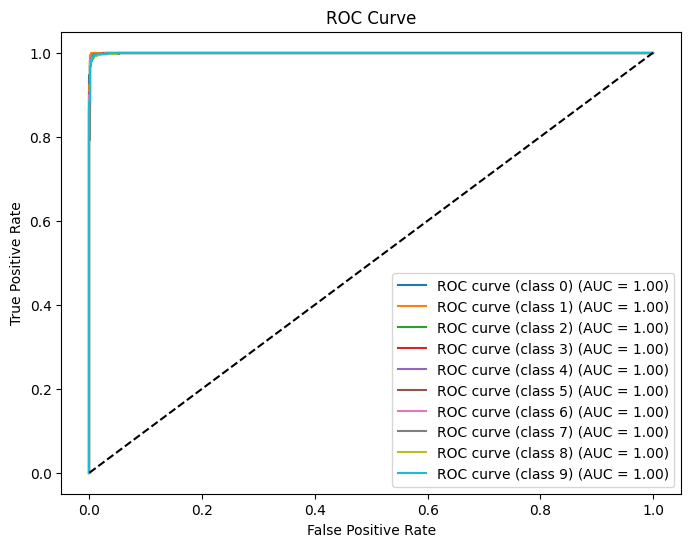

In [13]:
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Compute confusion matrix

In [14]:
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 972    0    1    0    0    0    3    1    2    1]
 [   0 1127    2    2    0    0    1    1    2    0]
 [   1    3 1007    2    1    0    3    9    5    1]
 [   1    0    4  991    0    4    0    6    2    2]
 [   0    0    4    0  956    0    2    2    2   16]
 [   2    1    0    6    1  875    4    1    1    1]
 [   5    4    1    1    2    2  943    0    0    0]
 [   1    1    6    1    1    0    0 1015    0    3]
 [   5    1    2    3    3    0    2    6  945    7]
 [   1    2    0    2    7    1    0    5    0  991]]


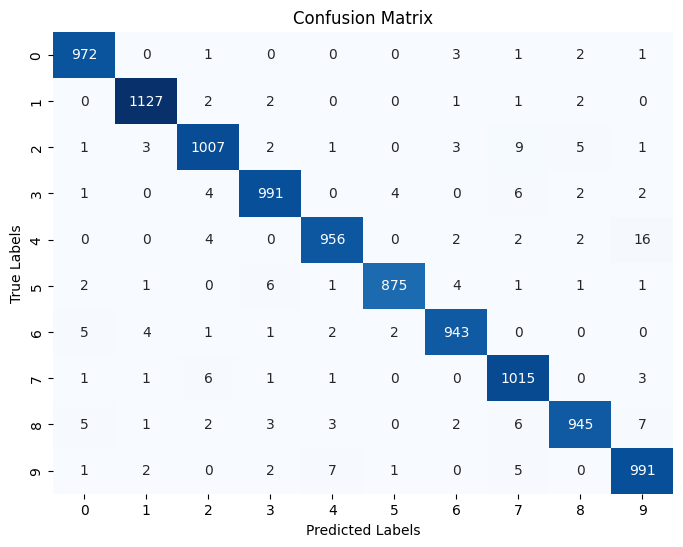

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Compute correlation matrix

In [15]:
corr_matrix = np.corrcoef(y_true, y_pred)
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
[[1.         0.97880269]
 [0.97880269 1.        ]]
